In [2]:
import numpy as np
import keras
import shutil
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator

In [3]:
mask_data = "C:\\Users\\hmku1\\객체지향\\일단 해보는거\\mask_data\\with_mask" 
no_mask_data = "C:\\Users\\hmku1\\객체지향\\일단 해보는거\\mask_data\\without_mask"

In [9]:
total_mask_images = os.listdir(mask_data)
print("number of mask images:: {}".format(len(total_mask_images)))
total_nonmask_images = os.listdir(no_mask_data)
print("number of non-mask images:: {}".format(len(total_nonmask_images)))

number of mask images:: 690
number of non-mask images:: 686


In [10]:
train_batch = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, shear_range=0.2).\
            flow_from_directory('C:\\Users\\hmku1\\객체지향\\일단 해보는거\\mask_data', target_size=(224,224), batch_size=32, class_mode = 'categorical')

Found 1376 images belonging to 2 classes.


In [11]:
train_batch.class_indices

{'with_mask': 0, 'without_mask': 1}

In [12]:
class_mask = ['mask', 'no mask']

In [13]:
from keras.applications.vgg16 import VGG16

In [14]:
IMAZE_SIZE = [224,224]
vgg = VGG16(input_shape=IMAZE_SIZE+[3], weights='imagenet', include_top=False)

In [15]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
for layers in vgg.layers:
    layers.trainable = False

In [17]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
flatten_layer = keras.layers.Flatten()(vgg.output)
prediction_layer = keras.layers.Dense(2, activation='softmax')(flatten_layer)

model = keras.models.Model(inputs = vgg.input, outputs = prediction_layer)

In [19]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
r = model.fit_generator(train_batch, validation_data=test_batch, epochs=5, steps_per_epoch=len(train_batch), validation_steps=len(test_batch))

NameError: name 'test_batch' is not defined

In [22]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

mask


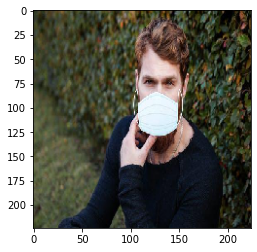

In [23]:
img = image.load_img('C:\\Users\\hmku1\\객체지향\\일단 해보는거\\mask_data\\with_mask\\0-with-mask.jpg', target_size=(224,224))
x=image.img_to_array(img)
x = np.expand_dims(x,0)
y = preprocess_input(x)
pred = class_mask[np.argmax(model.predict(y))]
print(pred)
plt.imshow(img)